# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** I Gusti Ngurah Bagus Ferry Mahayudha
- **Email:** gunggus2367@gmail.com
- **ID Dicoding:** gung_nikky

## Menentukan Pertanyaan Bisnis

### Time-Series Analysis (No. 1 - 2)

1. Pada salah satu stasiun, berapa banyak unsur udara seperti : 
   - PM2.5 pada tiap bulan dalam setiap tahun?
   - PM10 pada tiap bulan dalam setiap tahun?
   - SO2 pada tiap bulan dalam setiap tahun?
   - NO2 pada tiap bulan dalam setiap tahun?
   - CO pada tiap bulan dalam setiap tahun?
   - O3 pada tiap bulan dalam setiap tahun?

2. Pada salah satu stasiun, apakah ada hubungan antara :
   - PM2.5 dengan O3, Suhu Udara, Tekanan, dan Curah Hujan
   - PM10 dengan O3, Suhu Udara, Tekanan, dan Curah Hujan
   - SO2 dengan O3, Suhu Udara, Tekanan, dan Curah Hujan
   - NO2 dengan O3, Suhu Udara, Tekanan, dan Curah Hujan
   - CO dengan O3, Suhu Udara, Tekanan, dan Curah Hujan

### Analisis non lanjut

3. Di stasiun manakah kandungan udara :
   - PM2.5 terbesar 
   - PM10 terbesar 
   - SO2 terbesar 
   - NO2 terbesar 
   - CO terbesar 
   - O3 terbesar

4. Di stasiun manakah :
   - jumlah O3 terbesar 
   - Suhu Udara terbesar 
   - Tekanan terbesar 
   - Curah Hujan terbesar

## Import Semua Packages/Library yang Digunakan

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

**Menggabungkan seluruh data sehingga menjadi satu dataset**

In [3]:
main_path = 'data'
csvs = []
for i in os.listdir(main_path):

    csvs.append(pd.read_csv(os.path.join(main_path, i)))

df = pd.concat(csvs)

In [4]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

**Mencari missing value**

In [5]:
df.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

**Mencari data duplikat**

In [6]:
df.duplicated().sum()

0

**Melihat info tipe data dan jumlah data non-null**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


**Mencari outliers**

In [8]:
def outliers(series):

    q25, q75 = np.percentile(series, 25), np.percentile(series, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    
    outliers = [x for x in series if x < minimum or x > maximum]
    return outliers

outlier_dict = {}

for i in df.columns:

    if df[i].dtypes != 'O':
        outlier_dict[i] = sorted(outliers(df[i]))

outlier_dict

{'No': [],
 'year': [],
 'month': [],
 'day': [],
 'hour': [],
 'PM2.5': [],
 'PM10': [],
 'SO2': [],
 'NO2': [],
 'CO': [],
 'O3': [],
 'TEMP': [],
 'PRES': [],
 'DEWP': [],
 'RAIN': [],
 'WSPM': []}

### Cleaning Data

**mengisi data kosong menggunakan metode interpolasi**

In [9]:
for i in df.columns:

    if df[i].dtypes != 'O' and df[i].isnull().sum() > 0:
        df[i].interpolate(method='linear',
                          limit_direction='forward',
                          inplace=True)

In [10]:
df['wd'].fillna('Unknown', inplace=True)

In [11]:
df.drop(columns=['DEWP'], inplace=True)

In [12]:
df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explorasi Data untuk Pertanyaan 1 dan 2

In [13]:
normal_df = df.copy()
num_columns = df.columns[5:14]

ss = StandardScaler()
for i in num_columns:
    normal_df[i] = ss.fit_transform(normal_df[i].to_numpy().reshape(-1, 1))

In [14]:
normal_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,RAIN,wd,WSPM,station
0,1,2013,3,1,0,-0.936870,-1.091733,-0.544062,-1.239670,-0.805381,0.345884,-1.244262,1.169212,-0.07851,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,-0.887457,-1.048457,-0.544062,-1.239670,-0.805381,0.345884,-1.279234,1.188306,-0.07851,N,4.7,Aotizhongxin
2,3,2013,3,1,2,-0.899810,-1.059276,-0.498392,-1.154372,-0.805381,0.275875,-1.279234,1.216948,-0.07851,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,-0.912163,-1.070095,-0.224377,-1.125939,-0.805381,0.258372,-1.305463,1.312420,-0.07851,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,-0.949223,-1.102551,-0.178708,-1.097507,-0.805381,0.258372,-1.357920,1.379250,-0.07851,N,2.0,Aotizhongxin


In [15]:
normal_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,4.207680e+05,4.207680e+05,4.207680e+05,4.207680e+05,4.207680e+05,4.207680e+05,4.207680e+05,4.207680e+05,4.207680e+05,420768.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,-2.021013e-16,-1.410386e-16,-4.660758e-17,-2.485738e-16,9.186422e-17,2.274990e-16,2.431700e-16,3.897096e-14,-9.456611e-19,1.730034
std,10122.116943,1.177198,3.448707,8.800102,6.922195,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.246674
min,1.000000,2013.000000,1.000000,1.000000,0.000000,-9.615763e-01,-1.113370e+00,-7.136954e-01,-1.409512e+00,-9.775287e-01,-9.980493e-01,-2.922899e+00,-2.706946e+00,-7.851032e-02,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,-7.392172e-01,-7.455295e-01,-5.897308e-01,-7.847474e-01,-6.332323e-01,-8.267746e-01,-9.120323e-01,-8.070559e-01,-7.851032e-02,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,-3.068521e-01,-2.478626e-01,-4.070539e-01,-2.160944e-01,-2.889359e-01,-2.316941e-01,8.465822e-02,-3.373373e-02,-7.851032e-02,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,3.849319e-01,4.337246e-01,1.866460e-01,5.800198e-01,2.275088e-01,4.333959e-01,8.540333e-01,7.873244e-01,-7.851032e-02,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,1.135465e+01,9.673018e+00,2.210787e+01,6.806770e+00,7.543808e+00,1.774324e+01,2.453984e+00,3.059555e+00,8.826746e+01,13.200000


In [16]:
normal_df['wd'].value_counts()

NE         43335
ENE        34142
NW         32600
N          30869
E          29752
SW         28756
NNE        28232
NNW        25326
WNW        24375
ESE        24220
SSW        22563
SE         20074
WSW        20040
S          19405
SSE        17694
W          17563
Unknown     1822
Name: wd, dtype: int64

In [17]:
main_path = 'Air_Condition'
amount_dict = {}


stations = [i.split("_")[2] for i in os.listdir(main_path)]
air_quality = df.columns[5:10]
aggregate = ['sum'] * 5

for i in stations:
    amount_dict[i] = {}
    for j in air_quality:

        air = [j] + [i for i in df.columns[10:14]]
        amount_dict[i][j] = normal_df[normal_df['station'] == i].groupby(by=['year',
                                                                             'month']).agg(dict(zip(air,
                                                                                                    aggregate))).reset_index()
        
        amount_dict[i][j]['date'] = pd.to_datetime(amount_dict[i][j]['year'].astype('str') + '-' + amount_dict[i][j]['month'].astype('str'),
                format='%Y-%M').apply(lambda x: x.strftime('%Y-%M'))
        
        amount_dict[i][j] = amount_dict[i][j][air + ['date']]

### Explorasi Data untuk Pertanyaan 3

In [18]:
air_df = df.copy()
"""air_df['date'] = pd.to_datetime(air_df['year'].astype('str') +\
                                    '-' +\
                                    air_df['month'].astype('str') +\
                                    '-' +\
                                    air_df['day'].astype('str'),
                                    format='%Y-%m-%d') + pd.to_timedelta(air_df['hour'], unit='h')"""

air_dict = {}

for j in air_quality:
    
    air_dict[j] = air_df.sort_values(by=[j],
                        ascending=False)
    air_dict[j]['rank'] = air_dict[j][j].rank(method='dense',
                                              ascending=False)
    air_dict[j] = air_dict[j][air_dict[j]['rank'] <= 5][[j,'station', 'rank']].reset_index(drop=True)

    for index, value in zip(air_dict[j]['rank'].value_counts().index,
                            air_dict[j]['rank'].value_counts()):
        del_index = []

        if value > 1:
            del_index += [idx for idx in air_dict[j][air_dict[j]['rank'] == index].index][1:]

        air_dict[j].drop(index=del_index,
                            inplace=True)

### Explorasi Data untuk Pertanyaan 4

In [19]:
weather_df = df.copy()
"""weather_df['date'] = pd.to_datetime(weather_df['year'].astype('str') +\
                                    '-' +\
                                    weather_df['month'].astype('str') +\
                                    '-' +\
                                    weather_df['day'].astype('str'),
                                    format='%Y-%m-%d') + pd.to_timedelta(weather_df['hour'], unit='h')"""

weather_dict = {}

for j in [i for i in df.columns[10:14]]:
    
    weather_dict[j] = weather_df.sort_values(by=[j],
                        ascending=False)
    weather_dict[j]['rank'] = weather_dict[j][j].rank(method='dense',
                                              ascending=False)
    weather_dict[j] = weather_dict[j][weather_dict[j]['rank'] <= 5][[j,'station', 'rank']].reset_index(drop=True)

    for index, value in zip(weather_dict[j]['rank'].value_counts().index,
                            weather_dict[j]['rank'].value_counts()):
        
        del_index = []
        
        if value > 1:
            del_index += [idx for idx in weather_dict[j][weather_dict[j]['rank'] == index].index][1:]

        weather_dict[j].drop(index=del_index,
                            inplace=True)

In [20]:
air_dict['CO']

,CO,station,rank
0,10000.000000,Shunyi,1.0
56,9985.714286,Aotizhongxin,2.0
57,9975.000000,Aotizhongxin,3.0
58,9971.428571,Aotizhongxin,4.0
59,9966.666667,Gucheng,5.0


## Visualization & Explanatory Analysis

### Pertanyaan 1: banyak unsur udara pada salah satu kota

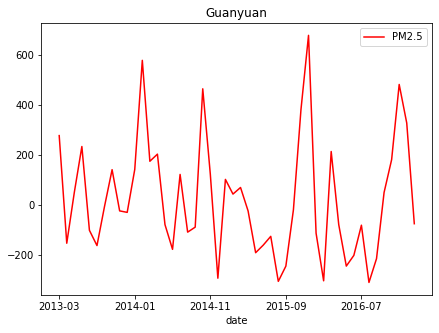

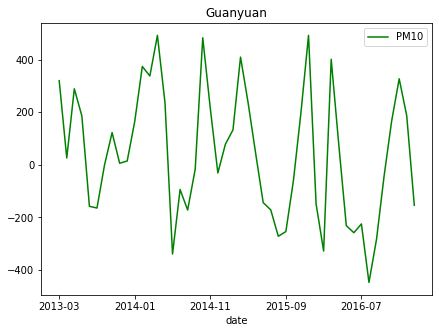

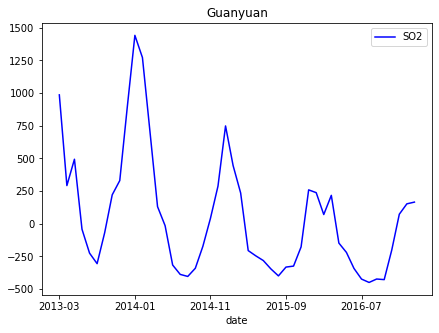

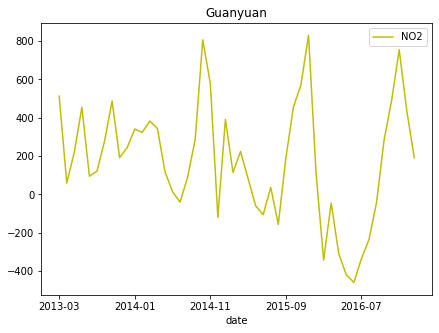

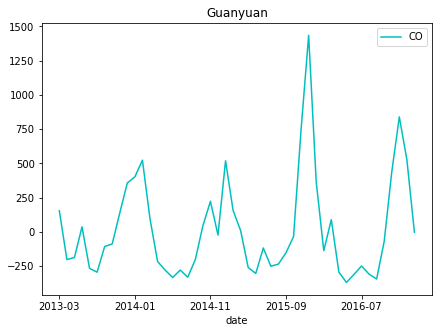

In [21]:
color = ['r', 'g', 'b', 'y', 'c']
for j, k in zip(air_quality, color):

    amount_dict["Aotizhongxin"][j].plot(x='date',
                            y=j,
                            figsize=(7,5),
                            color=k,
                            title="Guanyuan")

### Pertanyaan 2:

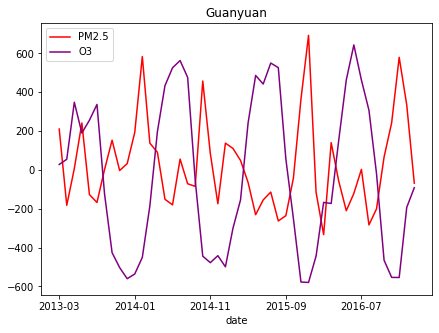

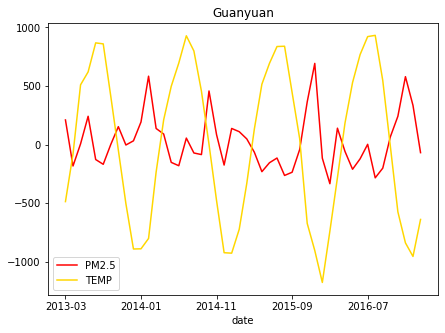

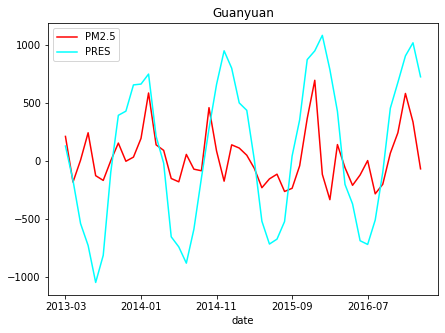

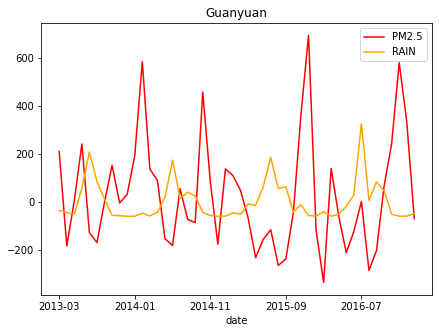

In [22]:
# color = ['r', 'g', 'b', 'y', 'lime']

sub_color = ['purple', 'gold', 'cyan', 'orange']
for l, m in zip(df.columns[10:14], sub_color):

    amount_dict["Guanyuan"]['PM2.5'].plot(x='date',
                            y=['PM2.5', l],
                            figsize=(7,5),
                            color=['r', m],
                            title="Guanyuan")

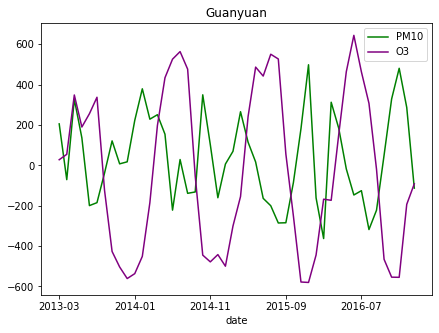

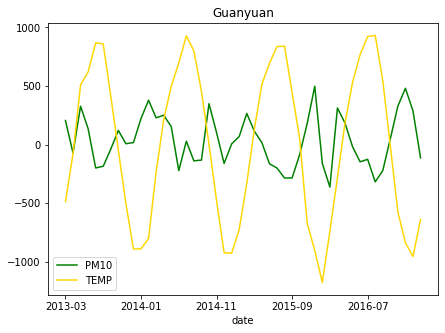

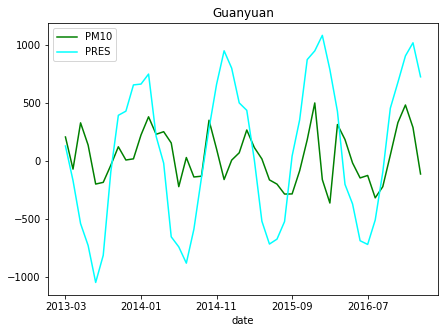

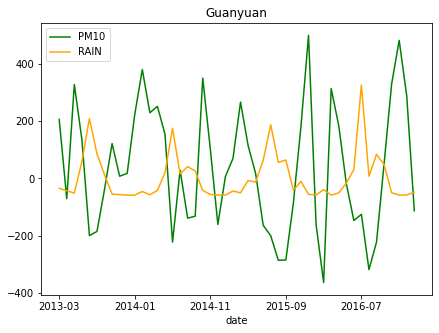

In [23]:
# color = ['r', 'g', 'b', 'y', 'lime']

sub_color = ['purple', 'gold', 'cyan', 'orange']
for l, m in zip(df.columns[10:14], sub_color):

    amount_dict["Guanyuan"]['PM10'].plot(x='date',
                            y=['PM10', l],
                            figsize=(7,5),
                            color=['g', m],
                            title="Guanyuan")

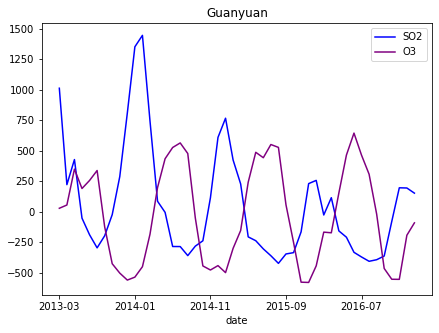

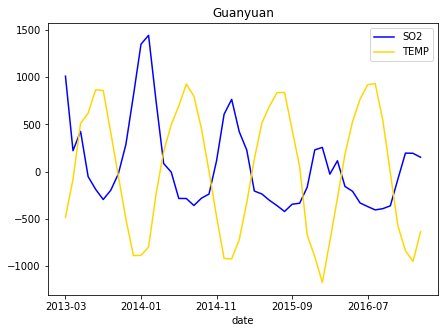

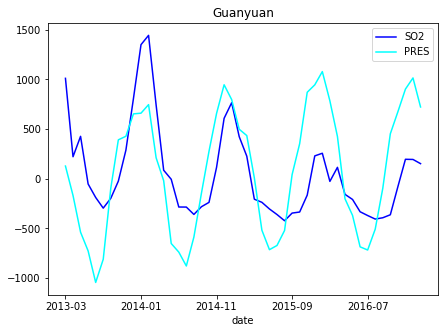

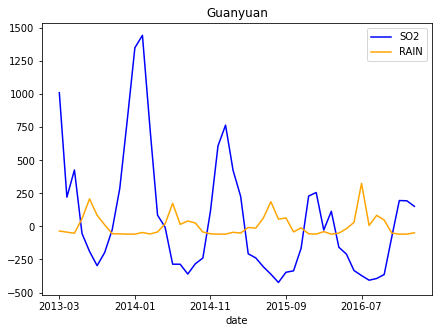

In [24]:
# color = ['r', 'g', 'b', 'y', 'lime']

sub_color = ['purple', 'gold', 'cyan', 'orange']
for l, m in zip(df.columns[10:14], sub_color):

    amount_dict["Guanyuan"]['SO2'].plot(x='date',
                            y=['SO2', l],
                            figsize=(7,5),
                            color=['b', m],
                            title="Guanyuan")

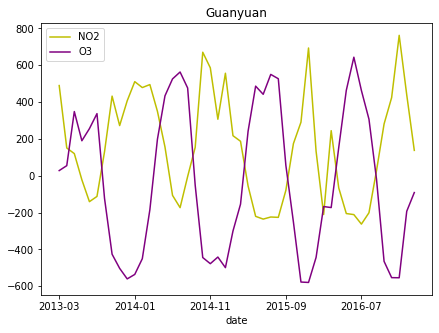

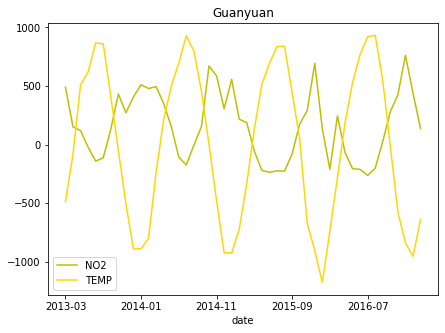

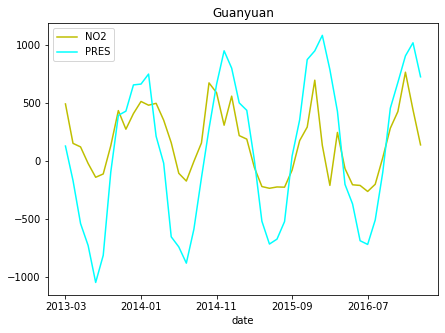

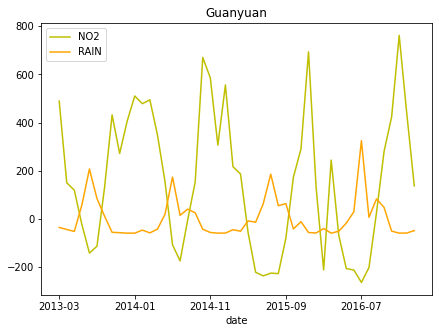

In [25]:
# color = ['r', 'g', 'b', 'y', 'lime']

sub_color = ['purple', 'gold', 'cyan', 'orange']
for l, m in zip(df.columns[10:14], sub_color):

    amount_dict["Guanyuan"]['NO2'].plot(x='date',
                            y=['NO2', l],
                            figsize=(7,5),
                            color=['y', m],
                            title="Guanyuan")

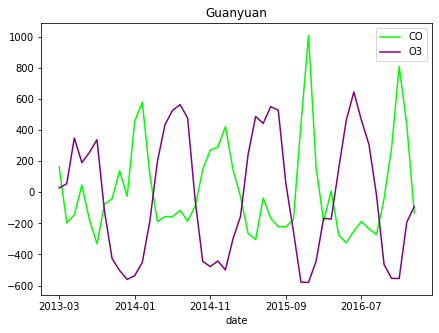

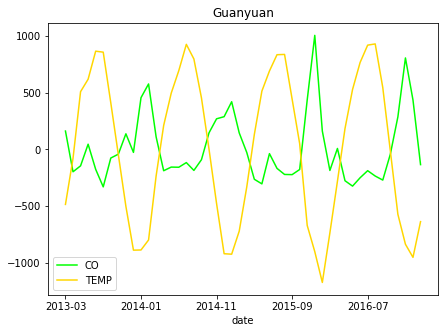

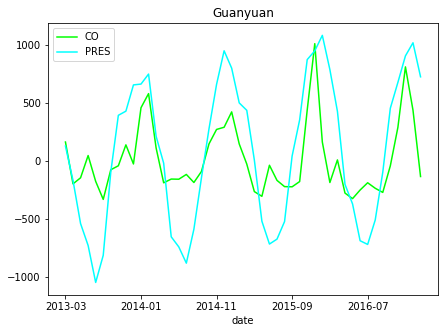

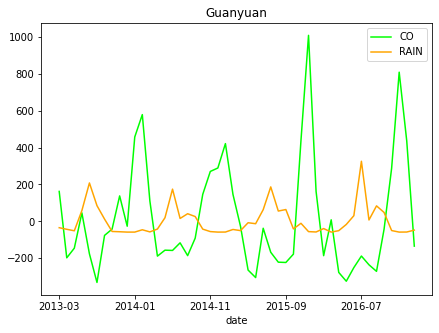

In [26]:
# color = ['r', 'g', 'b', 'y', 'lime']

sub_color = ['purple', 'gold', 'cyan', 'orange']
for l, m in zip(df.columns[10:14], sub_color):

    amount_dict["Guanyuan"]['CO'].plot(x='date',
                            y=['CO', l],
                            figsize=(7,5),
                            color=['lime', m],
                            title="Guanyuan")

### Pertanyaan 3:

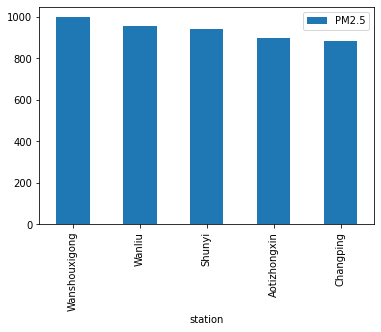

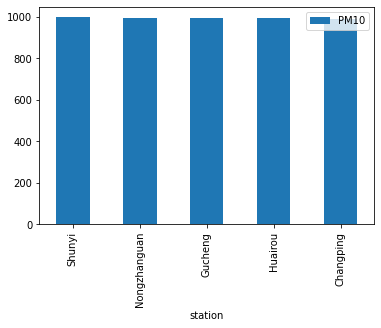

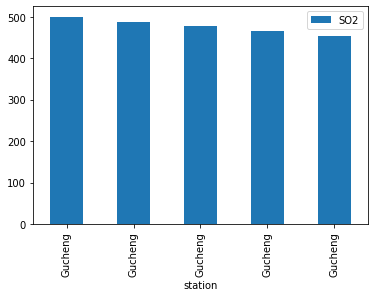

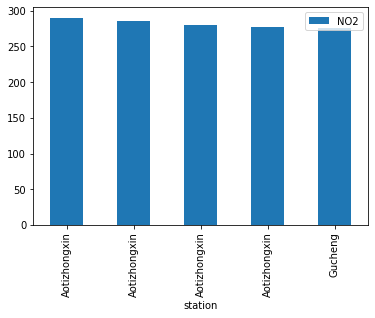

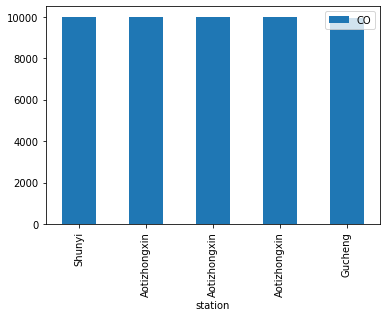

In [27]:
for i in air_dict:
    air_dict[i].plot(kind='bar',
                     x='station',
                     y=i)

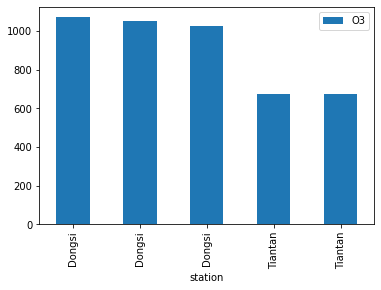

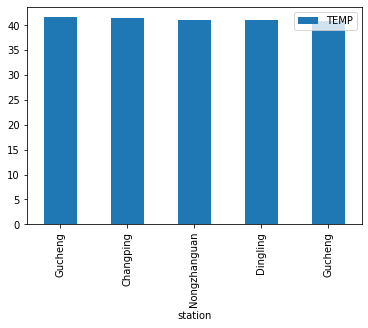

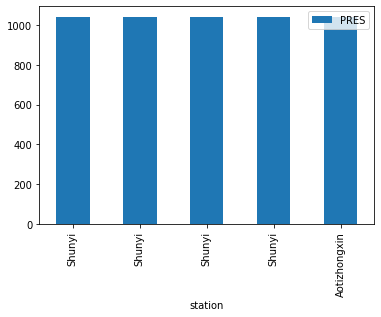

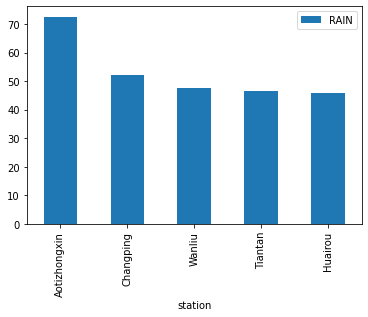

In [28]:
for i in weather_dict:
    weather_dict[i].plot(kind='bar',
                        x='station',
                        y=i)

## Conclusion

- Conclusion pertanyaan 1
  Pada salah satu kota yaitu Guanyuan, dalam periode tertentu, jumlah kandungan-kandungan udara meningkat dan menurun seperti :

  - kandungan PM2.5 yang meningkat dan menurun secara tidak menetu
  - kandungan PM10 yang meningkat dan menurun secara tidak menetu
  - kandungan SO2 yang meningkat pada musim dingin dan menurun pada musim panas
  - kandungan NO2 yang meningkat pada musim dingin dan menurun pada musim panas
  - kandungan CO yang meningkat pada musim dingin dan menurun pada musim panas

- Conclusion pertanyaan 2
  Pada salah satu kota yaitu Guanyuan, pengaruh kandungan-kandungan udara terhadap perubahan cuaca adalah:

  - Pengaruh PM2.5 terhadap perubahan cuaca adalah :
    - Peningkatan PM2.5 menyebabkan penurunan kandungan O3, namun dengan 2 titik puncak akibat penurunan drastis diantara 2 titik, begitu pula sebaliknya
    - Peningkatan PM2.5 menyebabkan penurunan suhu, namun dengan 2 titik puncak akibat penurunan drastis diantara 2 titik, begitu pula sebaliknya
    - Peningkatan PM2.5 menyebabkan peningkatan tekanan udara, namun dengan 2 titik puncak akibat penurunan drastis diantara 2 titik, begitu pula sebaliknya
    - Peningkatan PM2.5 menyebabkan penurunan curah hujan, namun dengan 2 titik puncak akibat penurunan drastis diantara 2 titik, begitu pula sebaliknya

  - Pengaruh PM10 terhadap perubahan cuaca adalah :
    - Peningkatan PM10 menyebabkan penurunan kandungan O3, namun dengan 2 titik puncak akibat penurunan drastis diantara 2 titik, begitu pula sebaliknya
    - Peningkatan PM10 menyebabkan penurunan suhu, namun dengan 2 titik puncak akibat penurunan drastis diantara 2 titik, begitu pula sebaliknya
    - Peningkatan PM10 menyebabkan peningkatan tekanan udara, namun dengan 2 titik puncak akibat penurunan drastis diantara 2 titik, begitu pula sebaliknya
    - Peningkatan PM10 menyebabkan penurunan curah hujan, namun dengan 2 titik puncak akibat penurunan drastis diantara 2 titik, begitu pula sebaliknya

  - Pengaruh SO2 terhadap perubahan cuaca adalah :
    - Peningkatan SO2 menyebabkan penurunan kandungan O3, begitu pula sebaliknya
    - Peningkatan SO2 menyebabkan penurunan suhu, begitu pula sebaliknya
    - Peningkatan SO2 menyebabkan peningkatan tekanan udara, begitu pula sebaliknya
    - Peningkatan SO2 menyebabkan penurunan curah hujan, begitu pula sebaliknya
  
  - Pengaruh NO2 terhadap perubahan cuaca adalah :
    - Peningkatan NO2 menyebabkan penurunan kandungan O3
    - Peningkatan NO2 menyebabkan penurunan suhu
    - Peningkatan NO2 menyebabkan peningkatan tekanan udara, begitu pula sebaliknya
    - Peningkatan NO2 menyebabkan penurunan curah hujan, begitu pula sebaliknya

  - Pengaruh CO terhadap perubahan cuaca adalah :
    - Peningkatan CO menyebabkan penurunan kandungan O3, begitu pula sebaliknya
    - Peningkatan CO menyebabkan penurunan suhu, begitu pula sebaliknya
    - Peningkatan CO menyebabkan peningkatan tekanan udara, begitu pula sebaliknya
    - Peningkatan CO menyebabkan penurunan curah hujan, begitu pula sebaliknya


In [29]:
normal_df.to_csv('PRSA_Data_Normalized.csv',
                 index=False)

In [30]:
df.to_csv('PRSA_Data.csv',
                 index=False)